# Breaking down CNN model
<hr>

## Binary Classification Explanation
- Become one with the data (visualize, visualize, visualize)
- Preprocess the data (prepared it for our model, by scaling - normalization)
- Create a model (start with a baseline)
- Fit the model
- Evaluate the model
- Adjust different parameters and improve the model (try to beat our baseline)
- Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

In [1]:
from helper_func import view_random_image

['2933332.jpg']
Image shape: (512, 512, 3)


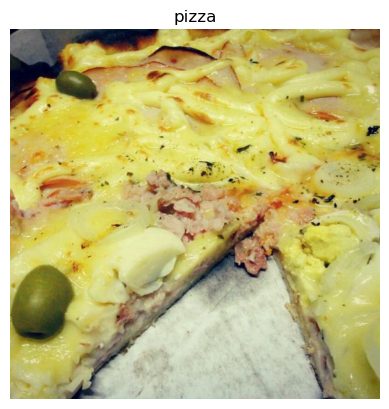

In [3]:
img = view_random_image(target_dir="../pizza_steak/train/", target_class="pizza")

In [4]:
import matplotlib.pyplot as plt

['3084957.jpg']
Image shape: (512, 512, 3)
['2824680.jpg']
Image shape: (512, 512, 3)


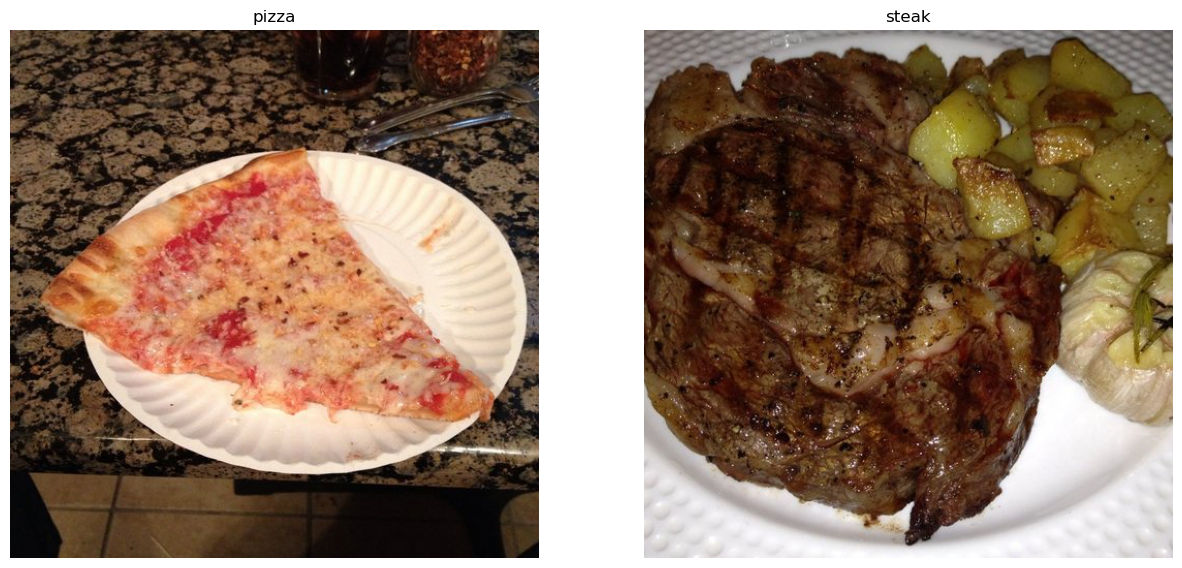

In [5]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
pizza_img = view_random_image(target_dir="../pizza_steak/train/", target_class="pizza")
plt.subplot(1,2,2)
steak_img = view_random_image(target_dir="../pizza_steak/train/", target_class="steak")

### 2. Preprocess the data

In [8]:
# Define the directory datasets paths
train_dir = "../pizza_steak/train/"
test_dir = "../pizza_steak/test/"

# Turn our data to batches
# Batch -> It is a small subset of data. Rather than look at all ~10,000 images at one time, 
# a model might only look at 32 at a time

# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load in image data from directories and turn them to batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               target_size=(224, 224), 
                                               class_mode="binary", batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, 
                                             target_size=(224, 224), 
                                             class_mode="binary", batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the `next` batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [10]:
# How many batches are there?
len(train_data)

47

In [11]:
1500/32

46.875

In [12]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.91372555, 0.909804  , 0.90196085],
          [0.90196085, 0.8980393 , 0.89019614],
          [0.9058824 , 0.90196085, 0.8941177 ],
          ...,
          [0.9215687 , 0.9333334 , 0.95294124],
          [0.91372555, 0.92549026, 0.9450981 ],
          [0.9215687 , 0.93725497, 0.9490197 ]],
 
         [[0.909804  , 0.9058824 , 0.8980393 ],
          [0.909804  , 0.9058824 , 0.8980393 ],
          [0.9058824 , 0.90196085, 0.8941177 ],
          ...,
          [0.92549026, 0.9294118 , 0.9490197 ],
          [0.9215687 , 0.92549026, 0.94117653],
          [0.9215687 , 0.92549026, 0.94117653]],
 
         [[0.91372555, 0.909804  , 0.90196085],
          [0.91372555, 0.909804  , 0.90196085],
          [0.909804  , 0.9058824 , 0.8980393 ],
          ...,
          [0.91372555, 0.9176471 , 0.93725497],
          [0.92549026, 0.9294118 , 0.9450981 ],
          [0.9215687 , 0.92549026, 0.9333334 ]],
 
         ...,
 
         [[0.19607845, 0.18431373, 0.21176472],
          [0.17647

In [13]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (starting with baseline)

**Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best way to get started is to start with something simple and see if it works on your and then introduce complexity as required (e.g look at which current model is performing best in the field for your problem).

In [15]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Input
from tensorflow.keras import Sequential

In [16]:
# Create the model (this will be the baseline, a 3 hidden layer convolutional neural network)
model_1 = Sequential([
    Input(shape=(224, 224, 3)), # input layer 
    Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer
])

In [17]:
# Compile the model
model_1.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=['accuracy'])

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
len(train_data)

47

In [20]:
# Fit the model
history_1 = model_1.fit(train_data, # this is the combination of labels and sample data
                        epochs=5, steps_per_epoch=len(train_data), 
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 56s 1s/step - loss: 0.8686 - accuracy: 0.5313 - val_loss: 0.6612 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 61s 1s/step - loss: 0.5747 - accuracy: 0.7120 - val_loss: 0.5003 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 60s 1s/step - loss: 0.4594 - accuracy: 0.7820 - val_loss: 0.5283 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 58s 1s/step - loss: 0.2232 - accuracy: 0.9127 - val_loss: 0.4845 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 62s 1s/step - loss: 0.0628 - accuracy: 0.9860 - val_loss: 0.9069 - val_accuracy: 0.7180


<AxesSubplot:>

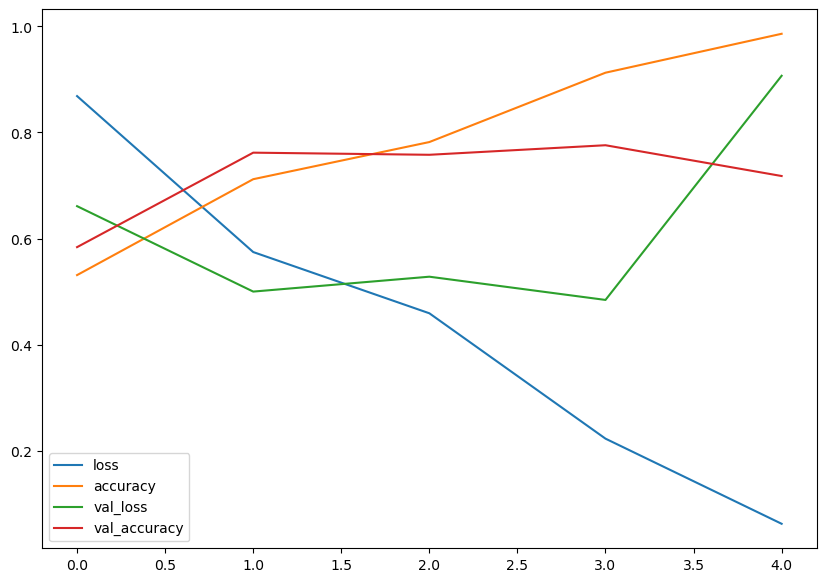

In [21]:
# Evaluating the model
import pandas as pd

# plot the model
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

In [35]:
# Plot the validation and training plot separately
# from helper_func import plot_loss_curves


ImportError: cannot import name 'plot_loss_curves' from 'helper_func' (C:\Users\AD\Desktop\Clone Pro\Deep-Learning-With-TensorFlow\04 - Convolutional Neural Network\code\helper_func.py)

In [29]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation matrix.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    # how many epochs
    epochs = range(len(history.history["loss"]))

    # plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

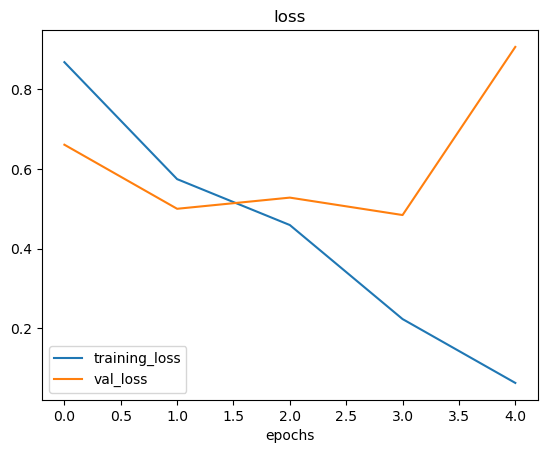

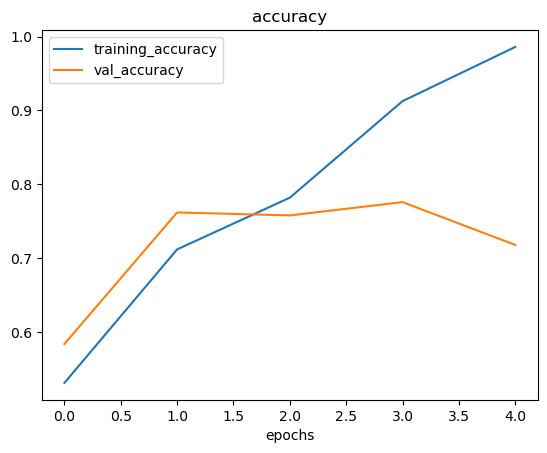

In [30]:
# checkout
plot_loss_curves(history_1)

> **Note:** When a model's **validation loss starts to increase**, it is likely the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize on unseen data will be diminishing...

<hr style="height: 5px">

**Adjust the model parameters**
- Ways to induce overfitting:
    - Increase the number of conv layers
    - Increase the number of conv filters
    - Add another dense layer to the output of our flattened layer
- Reduce overfitting:
    - Add data augmentation
    - Add regularization layers (such as MaxPool2D)
    - Add more data...

**Note:** Reducing overfitting is also known as `regularization`.

In [31]:
# Create the model
model_2 = Sequential([
    Conv2D(filters=10, kernel_size=3, padding="valid", input_shape=(224, 224, 3), activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [32]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)       

In [33]:
# Compile the model
model_2.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=['accuracy'])

In [34]:
# Fit the model
history_2 = model_2.fit(train_data, epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 449ms/step - loss: 0.5846 - accuracy: 0.6867 - val_loss: 0.4380 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 24s 502ms/step - loss: 0.4491 - accuracy: 0.8013 - val_loss: 0.3933 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 24s 503ms/step - loss: 0.4139 - accuracy: 0.8213 - val_loss: 0.3668 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 25s 529ms/step - loss: 0.3994 - accuracy: 0.8220 - val_loss: 0.3503 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 25s 541ms/step - loss: 0.3930 - accuracy: 0.8320 - val_loss: 0.3197 - val_accuracy: 0.8580


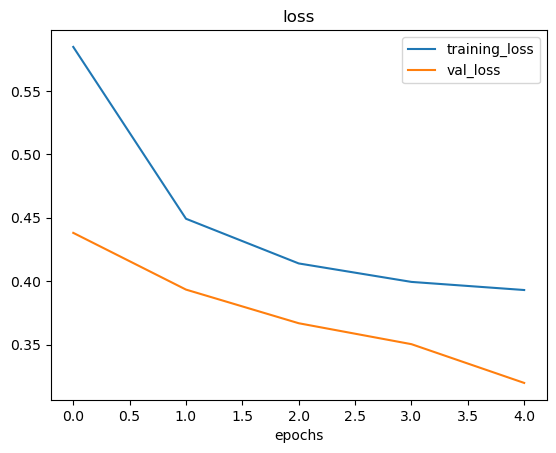

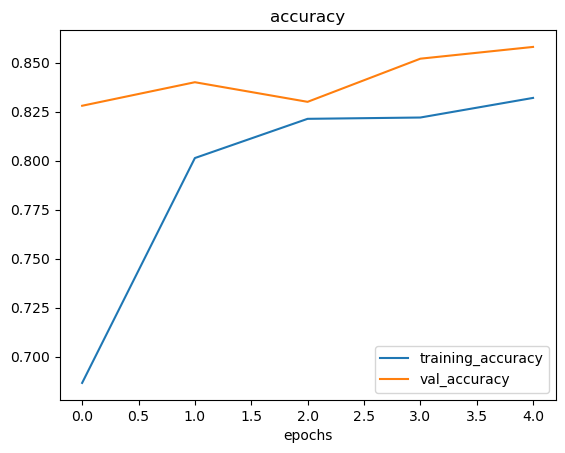

In [36]:
plot_loss_curves(history_2)

**Data Augmentation**

Data augmentation is the process of altering our training data leading it to have more diversity and in turn allowing our model to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similiar.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255, rotation_range=0.2, 
                                                shear_range=0.2, zoom_range=0.2, 
                                                width_shift_range=0.2, height_shift_range=0.3, horizontal_flip=True)

# Create ImageDataGenerator test instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)